# ANÁLISE EXPLORATÓRIA - MICRODADOS ANAC

Análise exploratória dos dados enviados ao site da ANAC (Agência Nacional de Aviação Civil) pelas empresas de aviação que operam no território brasileiro, com o objetivo principal de identificsr insights relevantes para as áreas de negócios.

A ANAC disponibiliza dados mensais organizados em duas classificações: Etapas Básicas e Etapas Combinadas:

## Etapa Básica (flight stage):
As etapas básicas são aquelas realizadas pela aeronave desde a sua decolagem até o próximo pouso, independentemente de onde tenha ocorrido o embarque ou o desembarque do objeto de transporte. Os dados estatísticos das etapas básicas representam o status da aeronave em cada etapa do voo, apresentando a movimentação de cargas e passageiros entre os aeródromos de origem e destino da aeronave. É a operação de uma aeronave entre uma decolagem e o próximo pouso, a ligação entre dois aeródromos.

## Etapa Combinada (On flight origin and destination - OFOD):
As etapas combinadas identificam os pares de origem, onde ocorreu o embarque do objeto de transporte, e destino, onde ocorreu o desembarque do objeto de transporte, independentemente da existência de aeródromos intermediários, atendidos por determinado voo. É a etapa de voo vista com foco no objeto de transporte (pessoas e/ou cargas), com base no embarque e no desembarque nos aeródromos relacionados. Os dados estatísticos da etapa combinada informam a origem e destino dos passageiros e cargas transportadas no voo, independentemente das escalas realizadas.

## Disclaimer: 
Apesar da ANAC disponibilizar dados das Etapas Básicas e Combinadas desde Janeiro de 2000, para efeito de análise preliminar serão utilizados somente os dados das Etapas Básicas, de Janeiro a Setembro de 2020.

# IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import missingno
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits import mplot3d

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# CARREGAMENTO DOS DATASETS

Para realizar o download dos 9 arquivos utilizados nesta análise, acesse os links:

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-01.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-02.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-03.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-04.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-05.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-06.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-07.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-08.zip

https://www.anac.gov.br/assuntos/setor-regulado/empresas/envio-de-informacoes/microdados/basica2020-09.zip

In [2]:
b1 = pd.read_csv('basica2020-01.txt',sep=";",encoding='latin-1')
b2 = pd.read_csv('basica2020-02.txt',sep=";",encoding='latin-1')
b3 = pd.read_csv('basica2020-03.txt',sep=";",encoding='latin-1')
b4 = pd.read_csv('basica2020-04.txt',sep=";",encoding='latin-1')
b5 = pd.read_csv('basica2020-05.txt',sep=";",encoding='latin-1')
b6 = pd.read_csv('basica2020-06.txt',sep=";",encoding='latin-1')
b7 = pd.read_csv('basica2020-07.txt',sep=";",encoding='latin-1')
b8 = pd.read_csv('basica2020-08.txt',sep=";",encoding='latin-1')
b9 = pd.read_csv('basica2020-09.txt',sep=";",encoding='latin-1')

b2020 = pd.concat([b1,b2,b3,b4,b5,b6,b7,b8,b9], ignore_index=True)

In [3]:
#Verficação das dimensões dos datasets (registros x features)
b2020.shape

(330198, 110)

# SELEÇÃO DE FEATURES 

In [4]:
#Eliminação das features redundantes como as que subdividem as datas em meses, trimestres, anos etc
b2020 = b2020.drop(columns=['nm_dia_semana_chegada_real','nm_dia_semana_partida_real',
                                'nm_dia_semana_referencia','nm_mes_chegada_real','nm_mes_partida_real',
                                'nm_mes_referencia','nm_semestre_chegada_real','nm_semestre_partida_real',
                                'nm_semestre_referencia','nm_trimestre_chegada_real',
                                'nm_trimestre_partida_real','nm_trimestre_referencia','nr_ano_chegada_real',
                                'nr_ano_partida_real','nr_ano_referencia','nr_dia_chegada_real',
                                'nr_dia_partida_real','nr_dia_referencia','nr_mes_chegada_real',
                                'nr_mes_partida_real','nr_mes_referencia','nr_semana_chegada_real',
                                'nr_semana_partida_real','nr_semana_referencia','nr_semestre_chegada_real',
                                'nr_semestre_partida_real','nr_semestre_referencia','nr_trimestre_chegada_real',
                                'nr_trimestre_partida_real','nr_trimestre_referencia'])


b2020.shape

(330198, 80)

# TIPOS DA VARIÁVEIS

In [5]:
b2020.dtypes

id_basica                    int64
id_empresa                   int64
sg_empresa_icao             object
sg_empresa_iata             object
nm_empresa                  object
nm_pais                     object
ds_tipo_empresa             object
nr_voo                       int64
nr_singular                 object
id_di                        int64
cd_di                       object
ds_di                       object
ds_grupo_di                 object
dt_referencia               object
nr_ano_mes_referencia        int64
id_tipo_linha                int64
cd_tipo_linha               object
ds_tipo_linha               object
ds_natureza_tipo_linha      object
ds_servico_tipo_linha       object
ds_natureza_etapa           object
hr_partida_real             object
dt_partida_real             object
nr_ano_mes_partida_real    float64
id_aerodromo_origem          int64
sg_icao_origem              object
sg_iata_origem              object
nm_aerodromo_origem         object
nm_municipio_origem 

In [6]:
#Conversão das features data para datetime
b2020.dt_referencia = pd.to_datetime(b2020.dt_referencia)
b2020.dt_sistema = pd.to_datetime(b2020.dt_sistema)
b2020.dt_partida_real = pd.to_datetime(b2020.dt_partida_real)

#Conversão de features categoricas em string
b2020.id_basica = b2020.id_basica.astype(str)
b2020.id_empresa = b2020.id_empresa.astype(str)
b2020.nr_voo = b2020.nr_voo.astype(str)
b2020.sg_empresa_icao = b2020.sg_empresa_icao.astype(str)
b2020.sg_empresa_iata = b2020.sg_empresa_iata.astype(str)
b2020.id_di = b2020.id_di.astype(str)
b2020.id_tipo_linha = b2020.id_tipo_linha.astype(str)
b2020.id_aerodromo_origem = b2020.id_aerodromo_origem.astype(str)
b2020.nr_etapa = b2020.nr_etapa.astype(str)
b2020.id_equipamento = b2020.id_equipamento.astype(str)
b2020.id_aerodromo_destino = b2020.id_aerodromo_destino.astype(str)
b2020.id_arquivo = b2020.id_arquivo.astype(str)
b2020.nr_linha = b2020.nr_linha.astype(str)

#A feature abaixo apresentou um  erro de digitação que impediu a sua conversao
#b2020.dt_chegada_real = pd.to_datetime(b2020.dt_chegada_real,'YYYY-MM-DD')

# VALORES NULOS

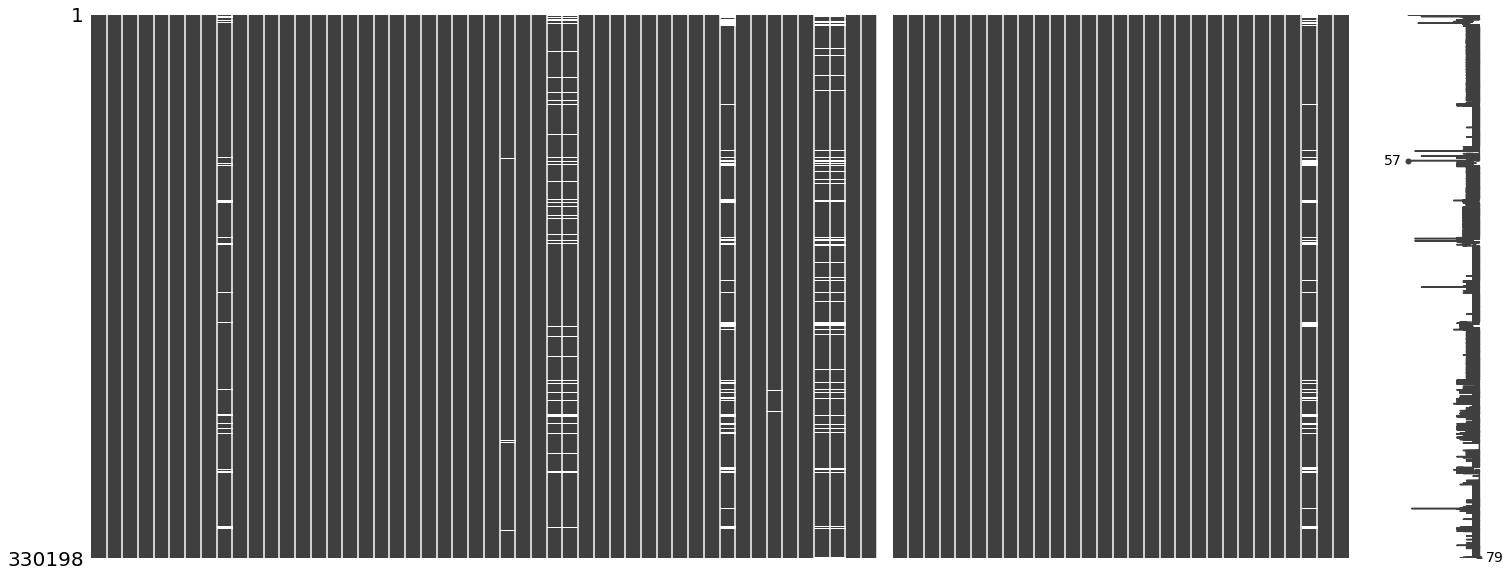

In [7]:
import missingno as msno 
  
msno.matrix(b2020) 

In [8]:
#Drop da feature nr_escala_destino (100% Null)
b2020.drop('nr_escala_destino', axis=1,inplace=True)
b2020.isna().sum()

id_basica                      0
id_empresa                     0
sg_empresa_icao                0
sg_empresa_iata                0
nm_empresa                     0
nm_pais                       11
ds_tipo_empresa                0
nr_voo                         0
nr_singular                17601
id_di                          0
cd_di                          0
ds_di                          0
ds_grupo_di                    0
dt_referencia                  0
nr_ano_mes_referencia          0
id_tipo_linha                  0
cd_tipo_linha                  0
ds_tipo_linha                  0
ds_natureza_tipo_linha         0
ds_servico_tipo_linha          0
ds_natureza_etapa              0
hr_partida_real                0
dt_partida_real                0
nr_ano_mes_partida_real        1
id_aerodromo_origem            0
sg_icao_origem                 0
sg_iata_origem              1338
nm_aerodromo_origem            0
nm_municipio_origem            0
sg_uf_origem               26486
nm_regiao_

Como esta é apenas uma análise exploratória, não faz-se necessário neste momento tratar os dados Nulos utilizando por exemplo média, mediana, 0, -1 entre outras possibilidades.

# DISTRIBUIÇÃO BÁSICA DAS FEATURES NUMÉRICAS

In [9]:
#Verificação distribuição básica de cada feature numérica

b2020.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nr_ano_mes_referencia,330198.0,2.020036e+05,2.749058e+00,202001.0,202001.00,202002.0,202006.0,2.020090e+05
nr_ano_mes_partida_real,330197.0,2.020035e+05,2.785898e+00,201912.0,202001.00,202002.0,202006.0,2.020100e+05
nr_ano_mes_chegada_real,330192.0,2.020036e+05,2.754277e+00,201912.0,202001.00,202002.0,202006.0,2.020100e+05
lt_combustivel,330198.0,5.142923e+03,8.687411e+03,0.0,1992.00,3402.5,6087.0,1.295610e+05
nr_assentos_ofertados,330198.0,1.469630e+02,7.094339e+01,0.0,118.00,168.0,186.0,6.360000e+02
kg_payload,330198.0,2.026809e+04,1.615298e+04,0.0,14091.25,16900.0,19800.0,2.420000e+05
km_distancia,330198.0,1.548990e+03,1.959532e+03,0.0,458.00,858.0,1804.0,1.223400e+04
nr_passag_pagos,330178.0,1.119790e+02,6.258037e+01,0.0,69.00,117.0,155.0,5.160000e+02
nr_passag_gratis,330178.0,2.548489e+00,3.591573e+00,0.0,0.00,1.0,4.0,2.070000e+02
kg_bagagem_livre,330178.0,6.842609e+02,8.032056e+02,0.0,217.00,540.0,927.0,1.601300e+04


# EDA - ANÁLISE EXPLORATÓRIA
Como para este momento não seria necessário rodar nenhum modelo, não fiz nenhum tipo de Scalling nos dados e não avaliei a possibilidade de redução de dimensionalidade através de PCA por exemplo.

## FLIGHTS x MÊS

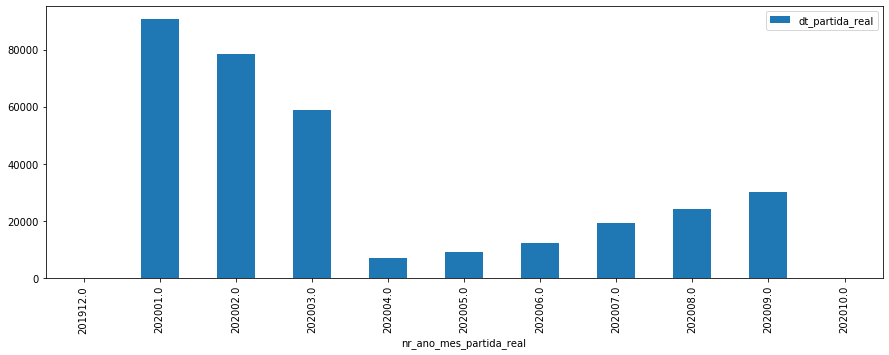

In [10]:
#QUEDA DE JANEIRO A ABRIL E LEVE RETOMADA A PARTIR DE MAIO DEVIDO A PANDEMIA COVID19
flight_month = b2020.groupby('nr_ano_mes_partida_real').agg({'dt_partida_real':'count'}).plot(kind='bar',figsize=(15,5))
plt.show()

## FLIGHTS x EMPRESA  (TOP 10)

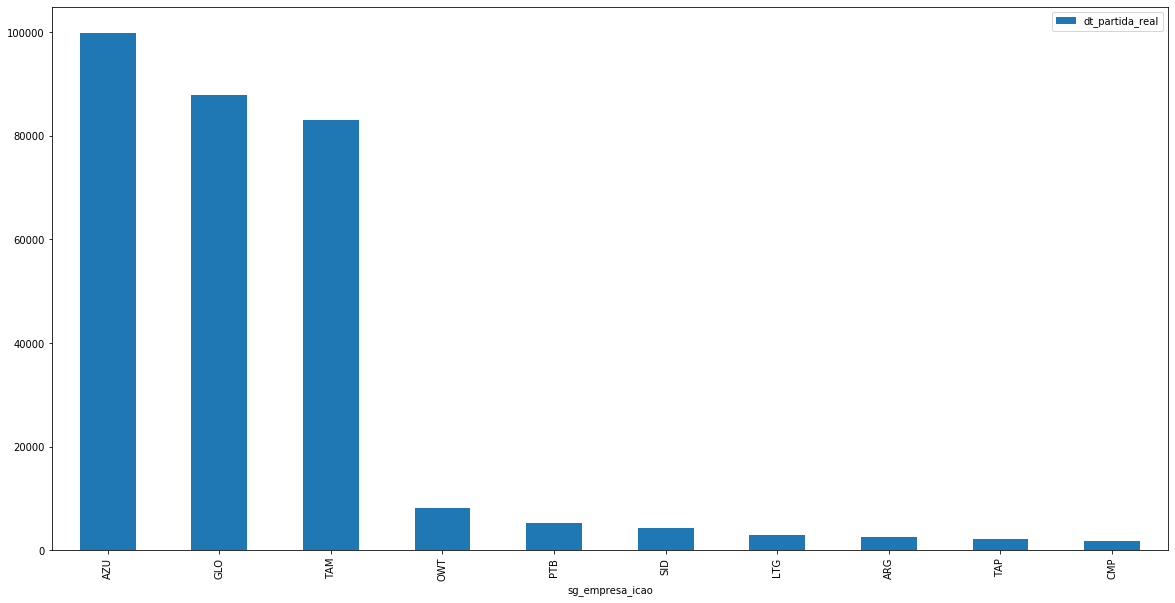

In [11]:
flight_empresa = b2020.groupby('sg_empresa_icao').agg({'dt_partida_real':'count'}).sort_values('dt_partida_real', ascending=False)
flight_empresa[0:10].plot(kind='bar',figsize=(20,10))

# COMPARATIVO ENTRE INDICADORES DAS TOP 3 EMPRESAS

## RPK
RPK = Volume de Passageiros Quilômetros Transportados (Revenue Passenger Kilometer). É calculado, em cada etapa básica, pelo produto entre o número de passageiros pagos e a distância da etapa.

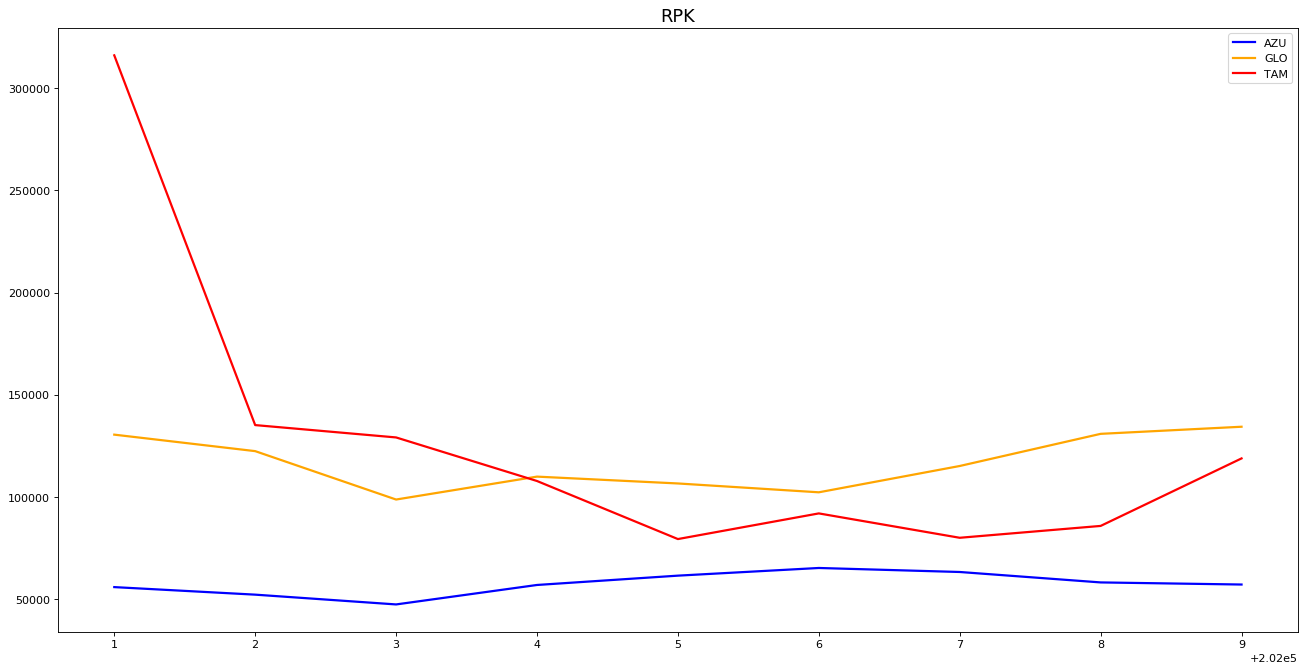

In [12]:
azu = b2020[b2020.sg_empresa_icao=="AZU"].groupby('nr_ano_mes_partida_real').agg({'nr_rpk':'median'}).reset_index()
glo = b2020[b2020.sg_empresa_icao=="GLO"].groupby('nr_ano_mes_partida_real').agg({'nr_rpk':'median'}).reset_index()
tam = b2020[b2020.sg_empresa_icao=="TAM"].groupby('nr_ano_mes_partida_real').agg({'nr_rpk':'median'}).reset_index()

azu=pd.DataFrame(azu)
glo=pd.DataFrame(glo)
tam=pd.DataFrame(tam)

x=azu.nr_ano_mes_partida_real
y1=azu.nr_rpk
y2=glo.nr_rpk
y3=tam.nr_rpk[0:9]

plt.figure(figsize=(20,10), dpi=80)
plt.plot( x, y1, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=2,label="AZU")
plt.plot( x, y2, marker='', color='orange', linewidth=2,label="GLO")
plt.plot( x, y3, marker='', color='red', linewidth=2, label="TAM")
plt.legend()
plt.title("RPK",size = 16)

plt.show()


## RTK
RTK = Volume de Toneladas Quilômetros Transportadas (Revenue Tonne Kilometer), expresso em (ton x km). É calculado, em cada etapa básica, pelo produto entre a quantidade, expressa em quilogramas, de passageiros, bagagem, carga e correio pagos transportada e a distância da etapa, dividido por 1000. Cada passageiro possui o peso estimado de 75kg, para empresas brasileiras. No caso das empresas estrangeiras, que não enviam dados de bagagem à ANAC, o peso total de passageiros e bagagens é estimado multiplicando-se a quantidade total de passageiros por 90.

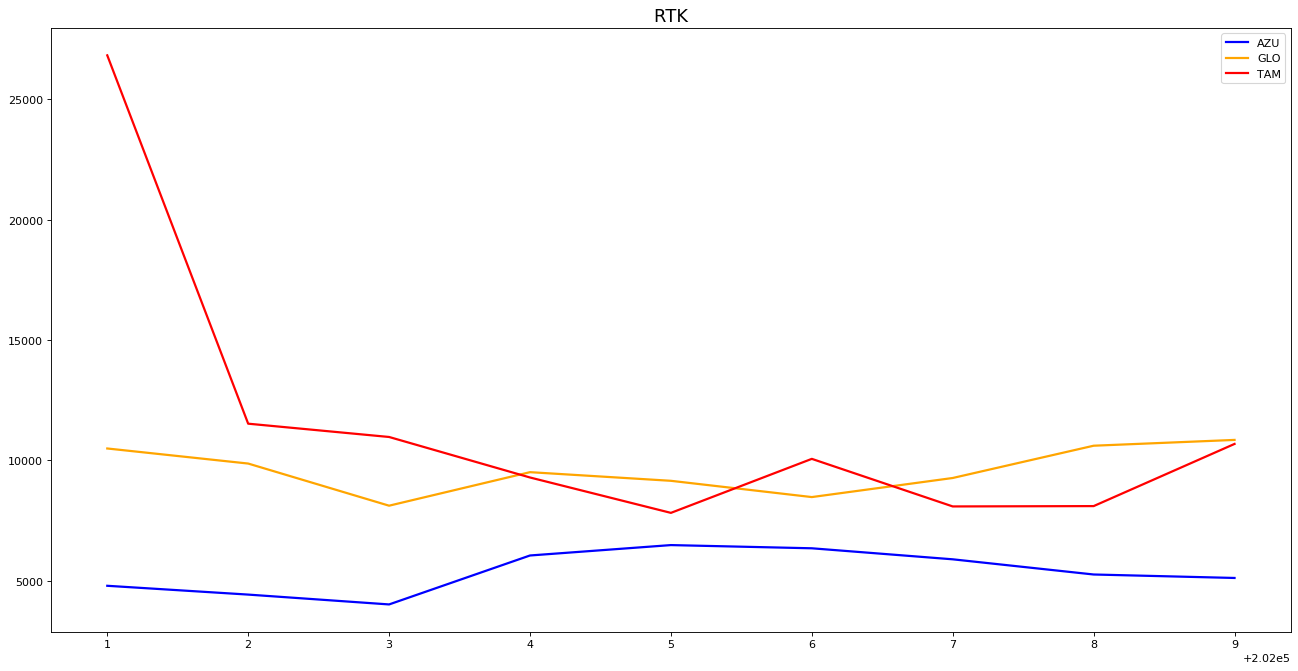

In [13]:
azu = b2020[b2020.sg_empresa_icao=="AZU"].groupby('nr_ano_mes_partida_real').agg({'nr_rtk':'median'}).reset_index()
glo = b2020[b2020.sg_empresa_icao=="GLO"].groupby('nr_ano_mes_partida_real').agg({'nr_rtk':'median'}).reset_index()
tam = b2020[b2020.sg_empresa_icao=="TAM"].groupby('nr_ano_mes_partida_real').agg({'nr_rtk':'median'}).reset_index()

azu=pd.DataFrame(azu)
glo=pd.DataFrame(glo)
tam=pd.DataFrame(tam)

x=azu.nr_ano_mes_partida_real
y1=azu.nr_rtk
y2=glo.nr_rtk
y3=tam.nr_rtk[0:9]

plt.figure(figsize=(20,10), dpi=80)
plt.plot( x, y1, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=2,label="AZU")
plt.plot( x, y2, marker='', color='orange', linewidth=2,label="GLO")
plt.plot( x, y3, marker='', color='red', linewidth=2, label="TAM")
plt.legend()
plt.title("RTK",size = 16)

plt.show()

In [14]:
b2020[['nr_pax_gratis_km','nr_rpk','nr_rtk']].describe()

,nr_pax_gratis_km,nr_rpk,nr_rtk
count,3.301780e+05,3.301780e+05,3.301780e+05
mean,4.077696e+03,2.080884e+05,3.044855e+04
std,1.406765e+04,4.230086e+05,7.459854e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.524900e+04,3.663000e+03
50%,1.014000e+03,8.488800e+04,8.385000e+03
75%,3.294000e+03,2.116400e+05,2.149000e+04
max,2.528920e+06,6.303970e+06,1.049670e+06


## CONSUMO DE COMBUSTÍVEL x DISTÂNCIA x PESO

In [15]:
#criado df novo para tratar os valores nulos e zeros destas 3 features
consumo_peso = b2020[['km_distancia','lt_combustivel','kg_peso']]
consumo_peso.describe()

,km_distancia,lt_combustivel,kg_peso
count,330198.00000,330198.000000,330178.000000
mean,1548.99043,5142.923410,12154.310660
std,1959.53166,8687.411328,9945.832834
min,0.00000,0.000000,0.000000
25%,458.00000,1992.000000,7457.000000
50%,858.00000,3402.500000,10742.000000
75%,1804.00000,6087.000000,13937.000000
max,12234.00000,129561.000000,145693.000000


In [16]:
#Existem 20 valores Null para a Feature kg_peso. 
#Como é um numero bem pequeno se comparado ao total da amostra (20/330K), os mesmos foram eliminados para 
#possibilitar a visualização de um gráfico de dispersão

consumo_peso = b2020[['km_distancia','lt_combustivel','kg_peso']].dropna()

In [17]:
#Também existem aprox 10% dos valores da feature lt_combustivel = 0, e da mesma forma estes valores serão 

consumo_peso.lt_combustivel.value_counts()

0        33389
2751      1736
2876      1717
2626      1692
3001      1581
         ...  
6961         1
73450        1
58158        1
52011        1
11884        1
Name: lt_combustivel, Length: 15408, dtype: int64

In [18]:
#eliminados para possibilitar a visualização de um gráfico de dispersão

consumo_peso = consumo_peso[consumo_peso['lt_combustivel']>0]

In [19]:
#Calculo de uma variavel que correlaciona Peso x Distancia 
# para verificar a influencia do Peso no consumo de combustivel
consumo_peso['km_peso'] = consumo_peso['kg_peso']*consumo_peso['km_distancia']

In [20]:
consumo_peso.describe()

,km_distancia,lt_combustivel,kg_peso,km_peso
count,296789.000000,296789.000000,296789.000000,2.967890e+05
mean,1111.854941,5721.852980,10555.834492,1.596011e+07
std,1116.840214,8980.770006,6291.772249,3.617793e+07
min,0.000000,1.000000,0.000000,0.000000e+00
25%,428.000000,2423.000000,7139.000000,3.523140e+06
50%,809.000000,3861.000000,10372.000000,7.456056e+06
75%,1469.000000,6629.000000,13399.000000,1.680615e+07
max,12121.000000,129561.000000,84472.000000,5.952294e+08


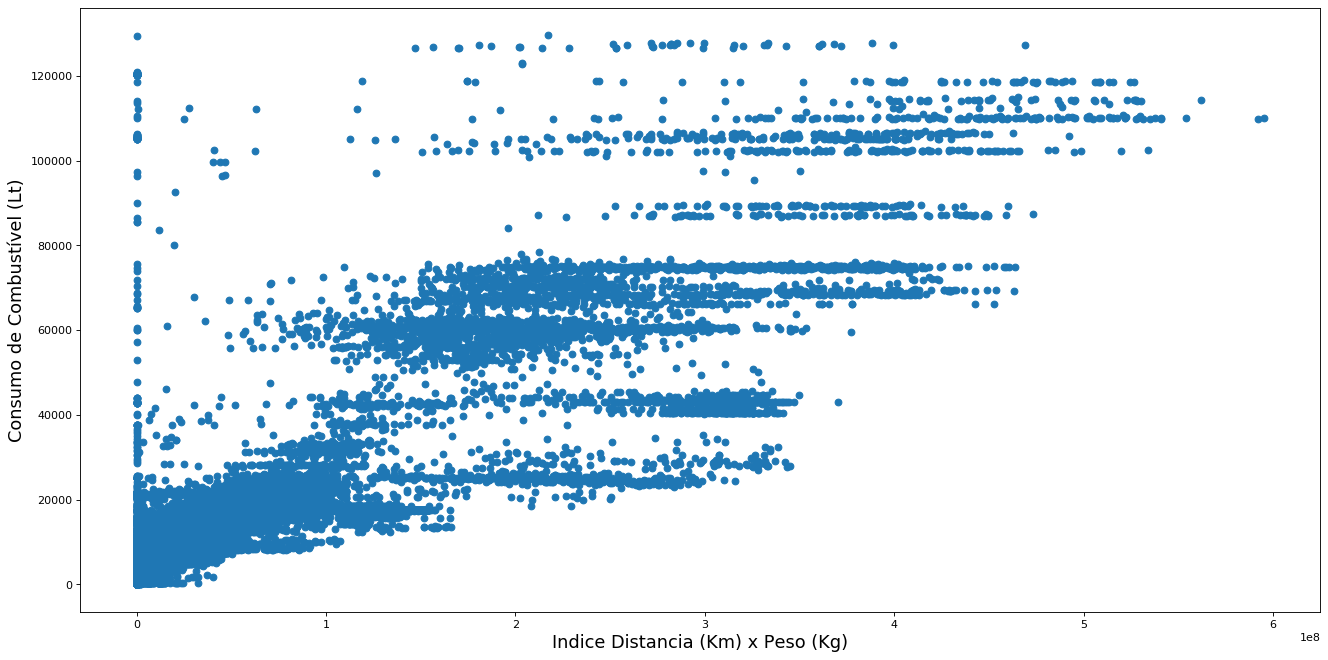

In [21]:
#Scatter plot para verificar a correlação das features Peso e Distancia associadas 
#em relação ao Consumo de Combustível
z = consumo_peso.kg_peso
x = consumo_peso.km_peso
y = consumo_peso.lt_combustivel

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(x,y)
plt.xlabel("Indice Distancia (Km) x Peso (Kg)", size=16)
plt.ylabel("Consumo de Combustível (Lt)", size=16)
plt.show()

No gráfico acima é possível notar uma Correlação maior e mesno dispersa entre o Consumo de Combustível e o Indice (Distancia x Peso) que no gráfico abaixo onde a correlação é menos evidente e possui maior dispersão.

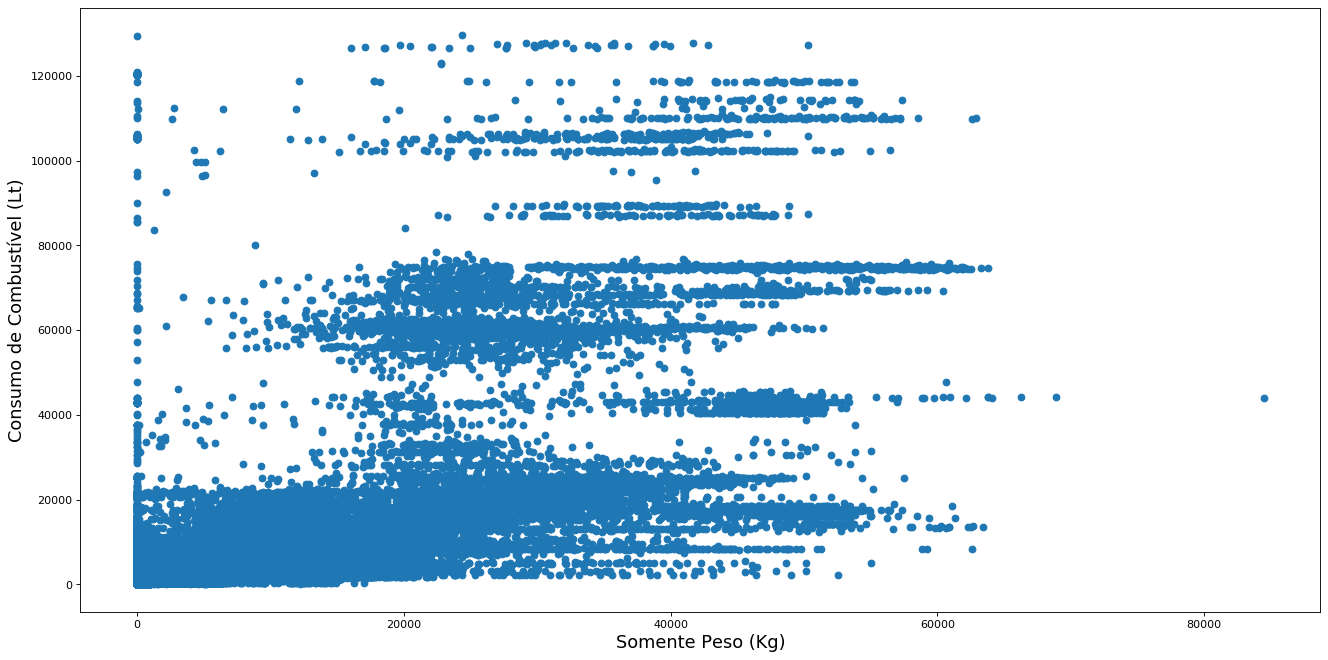

In [22]:
z = consumo_peso.kg_peso
x = consumo_peso.km_peso
y = consumo_peso.lt_combustivel

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(z,y)
plt.xlabel("Somente Peso (Kg)", size=16)
plt.ylabel("Consumo de Combustível (Lt)", size=16)
plt.show()